# DM_Lab1_Classification

In this assignment, you are a data scientist at the Pima Womans Hospital of Arizona. You have been asked by the hospital to develop a computer program that can accurately diagnose whether a patient has diabetes. You are provided with a dataset containing historical records of measurements and outcomes. 

You will be using some common data mining libraries to achieve your objective.

Detailed instructions and questions are given in following sections.


### The Data
The Pima Indians of Arizona have the highest rate of obesity and diabetes ever recorded. This
dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases,
with the objective to predict whether or not a patient has diabetes based on certain diagnostic
measurements. All the patients recorded in this dataset are females of the Pima Indian heritage.

The dataset consists of 8 medical predictor variables and one target variable, Outcome. Here is the description of each variable. Your task is to build classification models for predicting Outcome based on other variables.

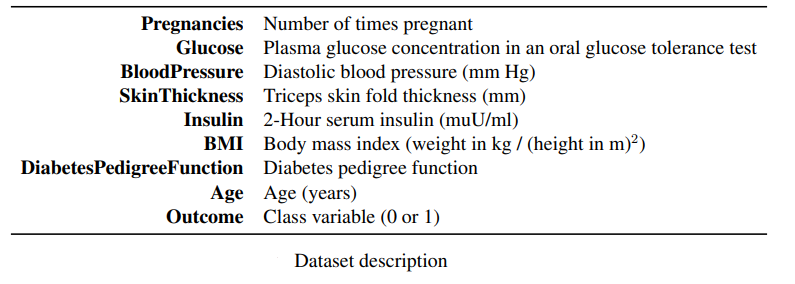

### What to Do
Tasks are divided into 4 parts: 1) Data Analysis −→ 2) Feature Transformation −→ 3) Model Construction −→ 4) Best Model Construction. 

Instructions and their corresponding marks allocated are given in each part.

**----- Import all libraries here -----**

In [29]:
# data manipulation
import pandas as pd
import numpy as np
from operator import itemgetter 

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # Confusion matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis 

<span style="color:black">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    


In [2]:
# --- Your code here ---
pima = pd.read_csv("diabetes.csv")

<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset.</span>

In [3]:
# --- Your code here ---
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. </span>

In [4]:
# --- Your code here ---
# Missing values for all attributes
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64

<span style="color:blue">--- Your answer here ---</span>
<br><span style="color:green">**ANS:** .</span>

In [8]:
# Replace missing values with mean
pima =pima.fillna(pima.mean())

In [9]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. </span>

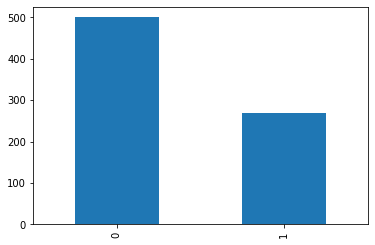

In [10]:
# --- Your code here ---
pima.Outcome.value_counts().plot(kind='bar')
plt.show()

<span style="color:blue">--- Your answer here ---</span><br><span style="color:green">**ANS:** 

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. </span>

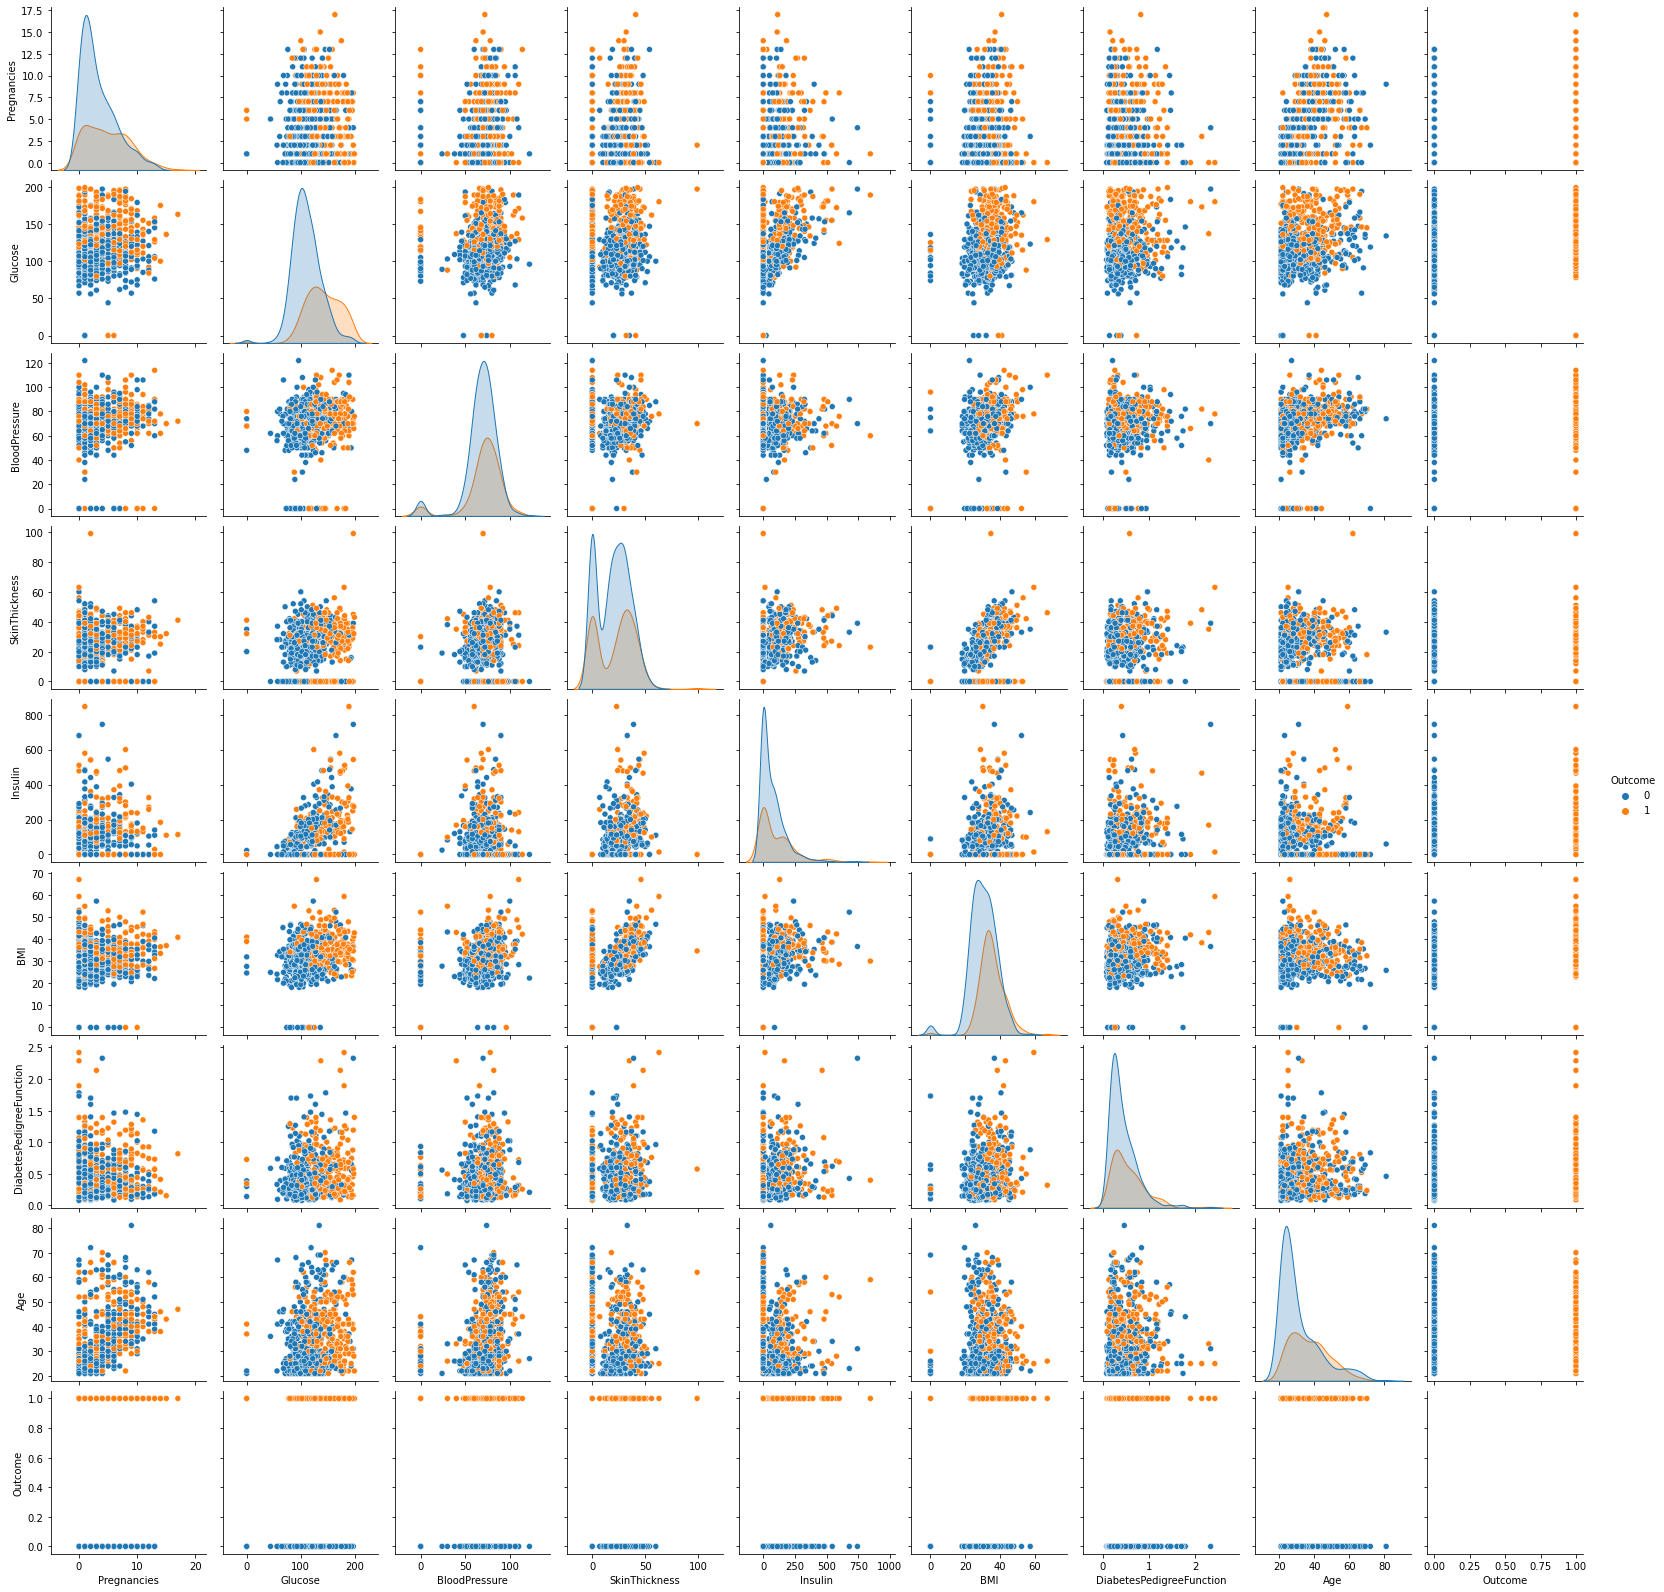

In [11]:
# --- Your code here ---
sb.pairplot(pima, vars=pima.columns, hue='Outcome')


<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target).<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

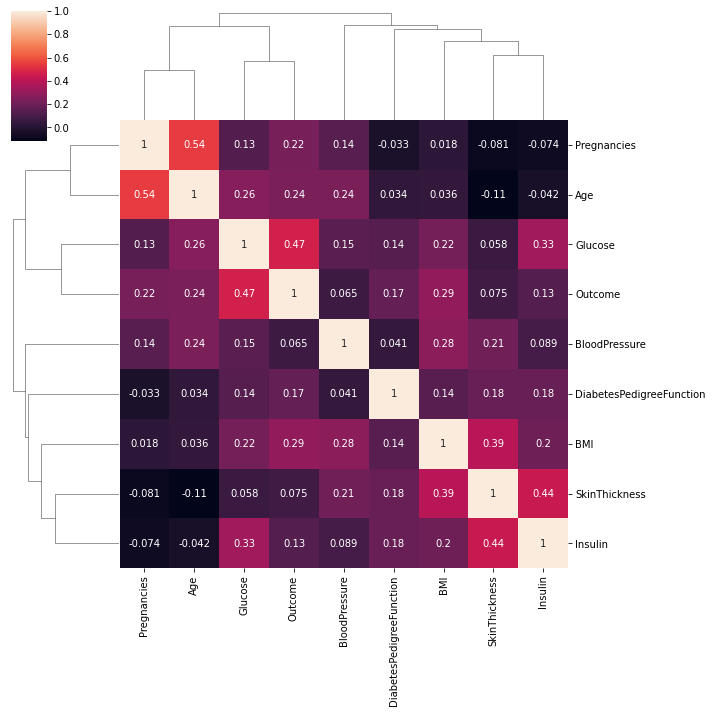

In [12]:
# --- Your code here ---
sb.clustermap(pima.corr(), annot=True)

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)?</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Your answer here ---</span><br>
<span style = "color:green">**ANS:** 

# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. </span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [15]:
# --- Your code here ---
pima1 = pima[:]
pima1.Pregnancies = pd.cut(pima1['Pregnancies'],4, labels=[0,1,2,3])

# According to American Diabetes Association
pima1.Glucose = pd.cut(pima1['Glucose'],[50,139.99,199.99,250], labels=[0, 1, 2])

pima1.BloodPressure = pd.cut(pima1['BloodPressure'],[0,79.99,89.99,99.99,109.99,150], labels=[0,1,2,3,4])
pima1.SkinThickness = pd.cut(pima1['SkinThickness'],4, labels=[0,1,2,3])
pima1.Insulin = pd.cut(pima1['Insulin'],4, labels=[0,1,2,3])
pima1.BMI = pd.cut(pima1['BMI'],4, labels=[0,1,2,3])
pima1.DiabetesPedigreeFunction = pd.cut(pima1['DiabetesPedigreeFunction'],4, labels=[0,1,2,3])
pima1.Age = pd.cut(pima1['Age'],4, labels=[0,1,2,3])

pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,0,1,0,2,0,1,1
1,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,2,3,0,1


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. </span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [16]:
# --- Your code here ---
pima1 = pd.get_dummies(pima1)
pima1.head()

,Outcome,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Glucose_0,Glucose_1,Glucose_2,BloodPressure_0,BloodPressure_1,...,BMI_2,BMI_3,DiabetesPedigreeFunction_0,DiabetesPedigreeFunction_1,DiabetesPedigreeFunction_2,DiabetesPedigreeFunction_3,Age_0,Age_1,Age_2,Age_3
0,1,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0


**Feature set 2 - Features normalization**

<span style="color:blue">3) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [17]:
# --- Your code here ---
pima2 = pima[:]
cols = pima2.columns.tolist()[0:8]
for col in cols:
    pima2[col] = (pima2[col] - pima2[col].mean()) / pima2[col].std()
pima2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.148827,0.907661,-0.692439,0.203880,0.469219,1.425067,1
1,-0.844335,-1.122665,-0.161224,0.531451,-0.692439,-0.683976,-0.364044,-0.190548,0
2,1.233077,1.942458,-0.264574,-1.286895,-0.692439,-1.102537,0.605077,-0.105515,1
3,-0.844335,-0.997558,-0.161224,0.155242,0.123221,-0.493721,-0.919553,-1.040871,0
4,-1.141108,0.503727,-1.504779,0.907661,0.765337,1.408828,5.483894,-0.020483,1


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case.</span>

<span style="color:blue">--- Your answer here ---<br><span style="color:green">**ANS:** 

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [18]:
# pima1 split
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 32) (768,)
(768, 8) (768,)


In [19]:
x1.shape

(768, 32)

<span style="color:blue">1)Experiment with the 2 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2: <br/></span>

<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- decision tree<br/></span>

<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. 

In [30]:
model_names = [ 'KNN','DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []
# --- Your code here ---

# K-Nearest neighbors
Kneigh_1 = KNeighborsClassifier()
Kneigh_1.fit(x_train1, y_train1)
pima1_acc.append(Kneigh_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Kneigh_1.predict(x_test1), average='weighted') )

Kneigh_2 = KNeighborsClassifier()
Kneigh_2.fit(x_train2, y_train2)
pima2_acc.append(Kneigh_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Kneigh_2.predict(x_test2), average='weighted') )

# Decision tree
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(x_train1, y_train1);
pima1_acc.append(Tree_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )

Tree_2 = DecisionTreeClassifier()
Tree_2.fit(x_train2, y_train2);
pima2_acc.append(Tree_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Tree_2.predict(x_test2), average='weighted') )

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

       pima1_acc  pima2_acc  acc_mean
Model                                
KNN     0.687500   0.812500      0.75
DT      0.734375   0.723958      0.73
avg     0.710938   0.768229      0.74


       pima1_f1  pima2_f1  F1_mean
Model                             
KNN    0.675597  0.808833    0.740
DT     0.723342  0.727515    0.730
avg    0.699470  0.768174    0.735


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? </span>

<span style="color:blue">--- Your answer ---</span><br>
<span style="color:green">**ANS:** From the print above, we can see that ***pima2*** generates better results for both accuracy and f1-score. And that perhaps is because our continuous data is ordinal, so one-hot is not the ideal choice here.

<span style="color:blue">3) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below with a brief describe how the feature importances for the given classifier can be computed. </span>

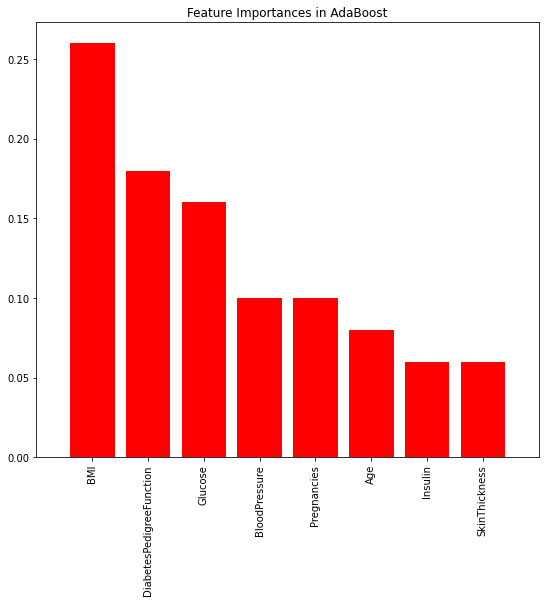

In [25]:
x_train = x_train2
y_train = y_train2

ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
relevants = ada.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

--- ---
Observations: BMI and DiabetesPedigreeFunction are more significantly important features, while Insulin and SkinThickness do not, which is because too many outliers in those two items.
As for Adaptive boosting classifier, there is an attribute called "feature_importances_". For trees, feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. And the node probability can be calculated by the number of samples that reach the node, divided by the total number of samples.

Think about how to compute the feature importances for KNN classifiers in and generate a similar bar plot showing the feature importances.

In [26]:
# --- Your code here ---
relevants

array([0.1 , 0.16, 0.1 , 0.06, 0.06, 0.26, 0.18, 0.08])

# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. </span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

In [31]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---
# Gaussian naive bayes
Gaussianed_1 = GaussianNB()
Gaussianed_1.fit(x_train1, y_train1);
pima1_acc.append(Gaussianed_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Gaussianed_1.predict(x_test1), average='weighted') )

Gaussianed_2 = GaussianNB()
Gaussianed_2.fit(x_train2, y_train2);
pima2_acc.append(Gaussianed_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Gaussianed_2.predict(x_test2), average='weighted') )

# K-Nearest neighbors
Kneigh_1 = KNeighborsClassifier()
Kneigh_1.fit(x_train1, y_train1)
pima1_acc.append(Kneigh_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Kneigh_1.predict(x_test1), average='weighted') )

Kneigh_2 = KNeighborsClassifier()
Kneigh_2.fit(x_train2, y_train2)
pima2_acc.append(Kneigh_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Kneigh_2.predict(x_test2), average='weighted') )

# Support Vector Machine
SVM_1 = SVC()
SVM_1.fit(x_train1, y_train1)
pima1_acc.append(SVM_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, SVM_1.predict(x_test1), average='weighted') )

SVM_2 = SVC()
SVM_2.fit(x_train2, y_train2)
pima2_acc.append(SVM_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, SVM_2.predict(x_test2), average='weighted') )

# Logistic regression
Logic_1 = LogisticRegression()
Logic_1.fit(x_train1, y_train1);
pima1_acc.append(Logic_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Logic_1.predict(x_test1), average='weighted') )

Logic_2 = LogisticRegression()
Logic_2.fit(x_train2, y_train2);
pima2_acc.append(Logic_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Logic_2.predict(x_test2), average='weighted') )

# Decision tree
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(x_train1, y_train1);
pima1_acc.append(Tree_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )

Tree_2 = DecisionTreeClassifier()
Tree_2.fit(x_train2, y_train2);
pima2_acc.append(Tree_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Tree_2.predict(x_test2), average='weighted') )

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

             pima1_acc  pima2_acc  acc_mean
Model                                      
Gaussian NB   0.692708   0.765625     0.730
KNN           0.687500   0.812500     0.750
SVM           0.770833   0.776042     0.770
LR            0.770833   0.802083     0.790
DT            0.713542   0.729167     0.720
avg           0.727083   0.777083     0.752


             pima1_f1  pima2_f1  F1_mean
Model                                   
Gaussian NB  0.622447  0.757481    0.690
KNN          0.675597  0.808833    0.740
SVM          0.760501  0.765123    0.760
LR           0.758795  0.794545    0.780
DT           0.701644  0.730266    0.720
avg          0.703797  0.771250    0.738


<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. </span><br>
<span style="color:green">**ANS:** It can help doctors **suggest** diagnose results, but certainly not accurate enough. And to use it, doctors should explain very clearly that the prediction result is only generated using previous data. Accuracy of the model should be stated too. I believe in places like hospitals where life and death is concerned, models should be extremely accurate which demmands larger and more precise datasets.